<h1><center>BREAST CANCER</h1></center>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline


In [49]:
df=pd.read_csv("D:\\semester 3\\ml\\lab dataset\\breast_cancer_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
df.describe().round()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,0.0
mean,30371831.0,14.0,19.0,92.0,655.0,0.0,0.0,0.0,0.0,0.0,...,26.0,107.0,881.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
std,125020586.0,4.0,4.0,24.0,352.0,0.0,0.0,0.0,0.0,0.0,...,6.0,34.0,569.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,8670.0,7.0,10.0,44.0,144.0,0.0,0.0,0.0,0.0,0.0,...,12.0,50.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
25%,869218.0,12.0,16.0,75.0,420.0,0.0,0.0,0.0,0.0,0.0,...,21.0,84.0,515.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
50%,906024.0,13.0,19.0,86.0,551.0,0.0,0.0,0.0,0.0,0.0,...,25.0,98.0,686.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
75%,8813129.0,16.0,22.0,104.0,783.0,0.0,0.0,0.0,0.0,0.0,...,30.0,125.0,1084.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
max,911320502.0,28.0,39.0,188.0,2501.0,0.0,0.0,0.0,0.0,0.0,...,50.0,251.0,4254.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN


In [51]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [52]:
df.shape

(569, 33)

There are 569 observations and 33 columns in the dataset

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [54]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [55]:
df=df.drop(['Unnamed: 32'],axis=1)

In [56]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

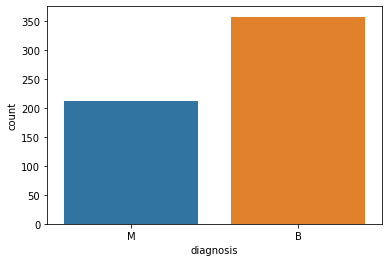

In [57]:
sns.countplot(data=df,x='diagnosis')

There are 212 Malignant and 357 Benign cases. And we are going to classify the malignant and benign based upon the other features which are there in the dataset.

In [58]:
#Label Encoding
le= LabelEncoder()
df.diagnosis=le.fit_transform(df.diagnosis)

**Univariate and bivariate analysis**

<AxesSubplot:xlabel='area_mean'>

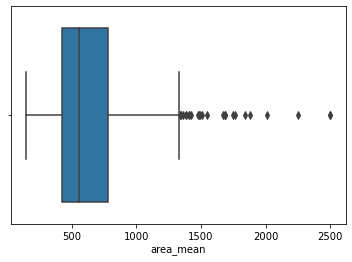

In [59]:
sns.boxplot(data=df,x='area_mean')

Area mean has outliers

<AxesSubplot:xlabel='radius_mean', ylabel='Density'>

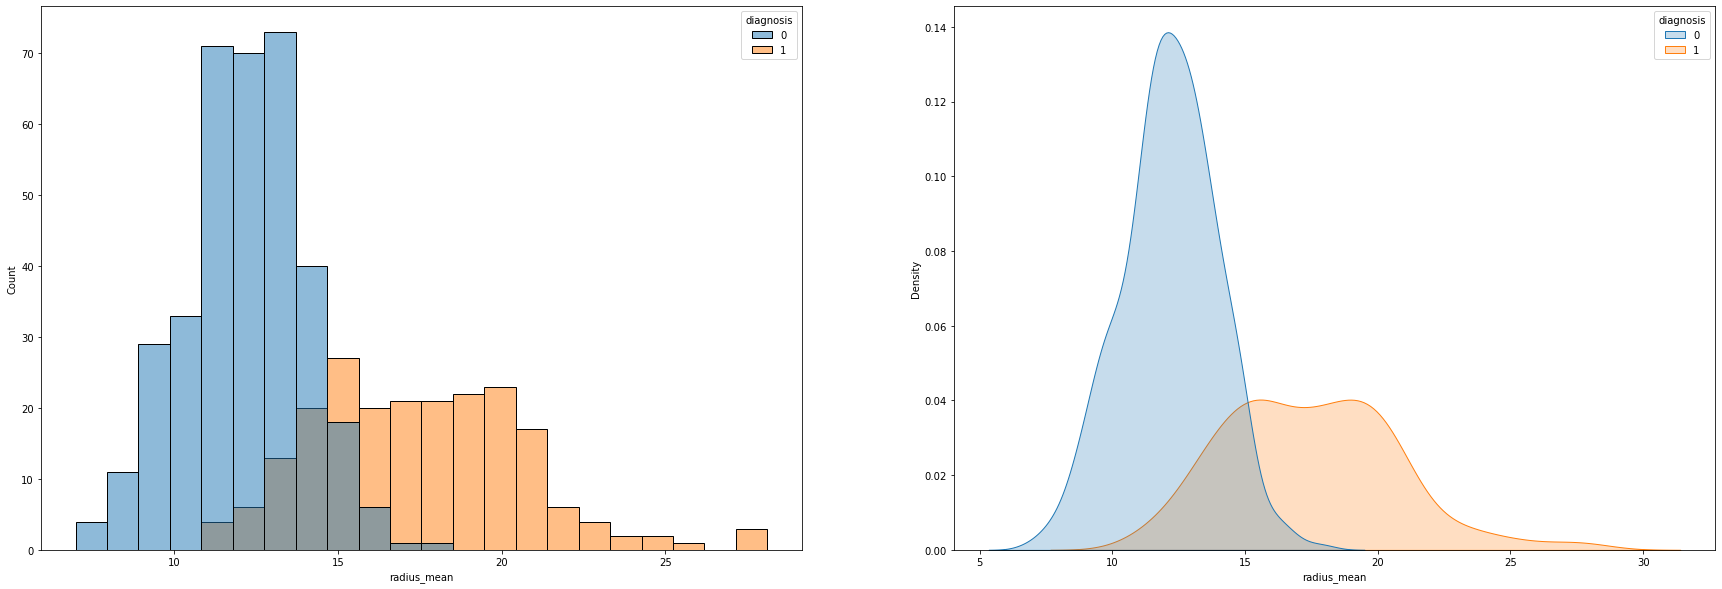

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(30,10))
sns.histplot(ax=axes[0],data=df,x='radius_mean',hue='diagnosis')
sns.kdeplot(ax=axes[1],data=df, x='radius_mean', hue='diagnosis', shade=True) 

The largest breast cancer cell (Malignant) has radius mean greater than 25

<AxesSubplot:xlabel='concavity_mean', ylabel='Count'>

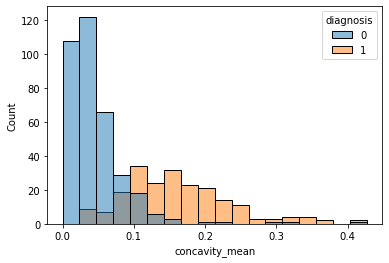

In [61]:
sns.histplot(data=df,x='concavity_mean',hue='diagnosis')

Most of the observations have the concavity mean around 0.05

<AxesSubplot:xlabel='concave points_mean', ylabel='Count'>

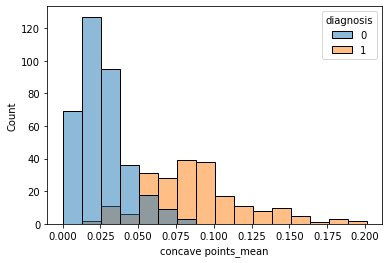

In [62]:
sns.histplot(data=df,x='concave points_mean',hue='diagnosis')

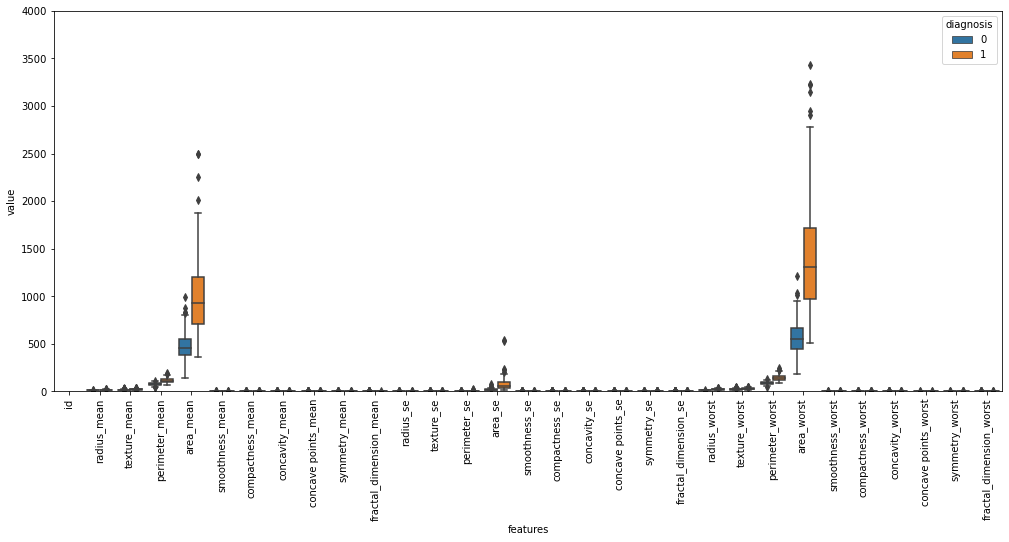

In [63]:
import matplotlib.pyplot as plt
data_melt = pd.melt(df, id_vars = "diagnosis",
                   var_name = "features",
                   value_name = "value")

plt.figure(figsize = (17,7))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melt)
plt.xticks(rotation = 90)
plt.ylim(0,4000)
plt.show()

**CORRELATION**

In [64]:
x=df.corr()['diagnosis']

In [65]:
x

id                         0.039769
diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0

From these correlation values we are going to set a boundary with a thershold value which is greater than 0.5 and we are going to call it as l1.

In [66]:
feature=x.index
corr=x.values
l1=[]
l2=[]

for i,j in zip(feature,corr):
      if j>0.5 or j< -0.5:
        l1.append(i)
        l2.append(j)
corr_data=pd.DataFrame(zip(l1,l2),columns=["feature","corr"])

In [67]:
corr_data

,feature,corr
0,diagnosis,1.000000
1,radius_mean,0.730029
2,perimeter_mean,0.742636
3,area_mean,0.708984
4,compactness_mean,0.596534
5,concavity_mean,0.696360
6,concave points_mean,0.776614
7,radius_se,0.567134
8,perimeter_se,0.556141
9,area_se,0.548236


The above features have high correlation with the target variable diagnosis

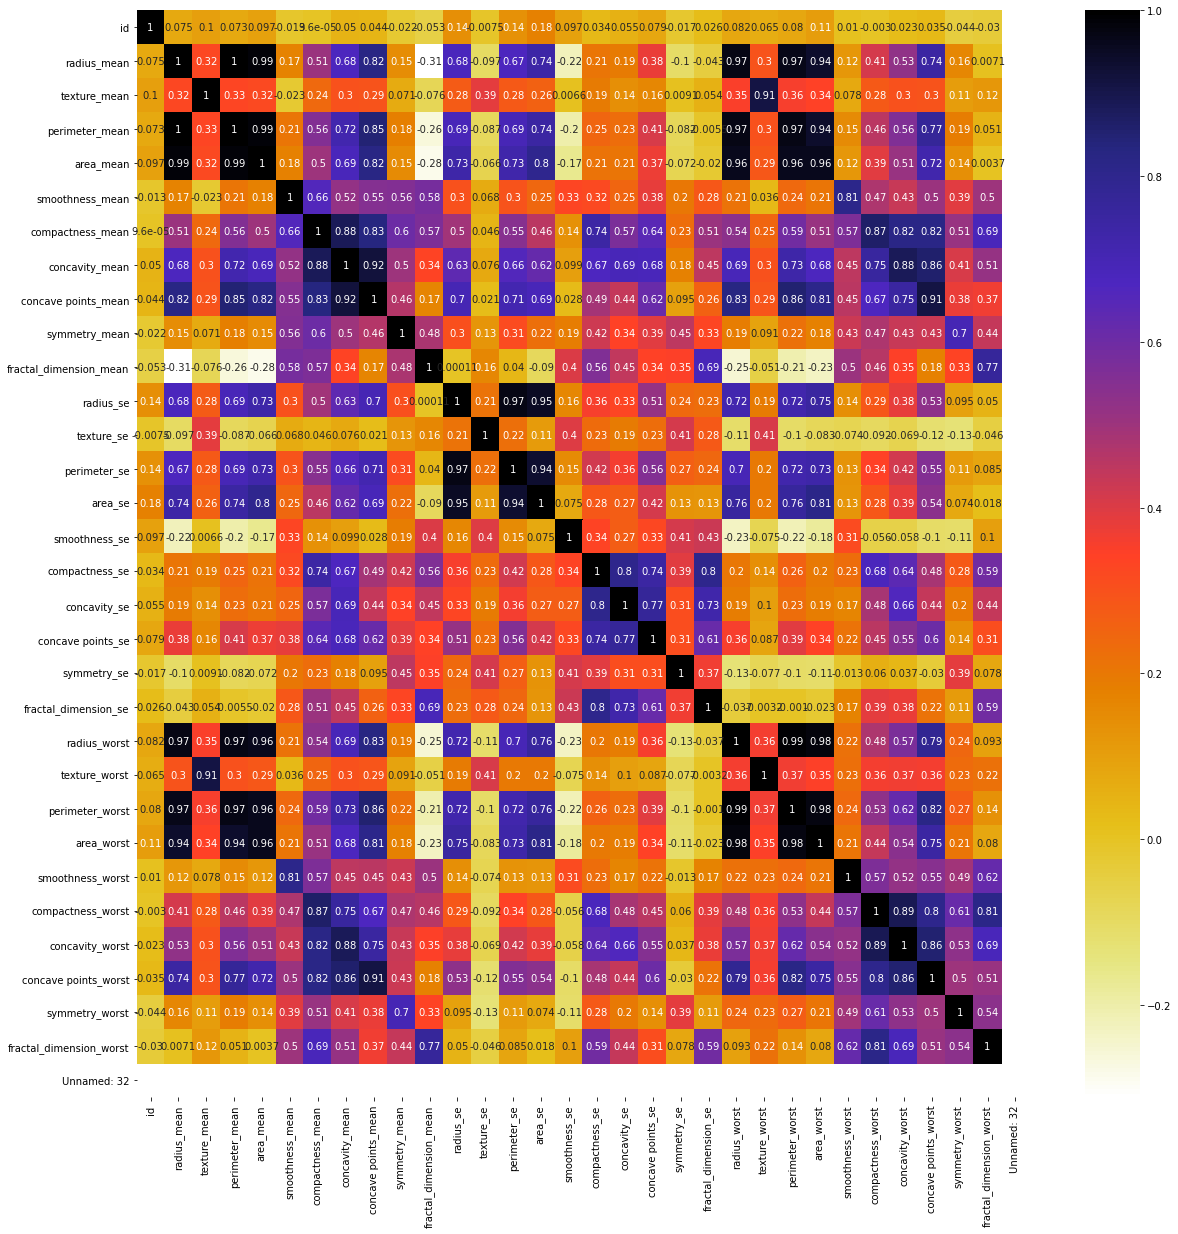

In [42]:
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

Now we are going to check skewness and whether the attributes are linearly correlated by the pairplot.

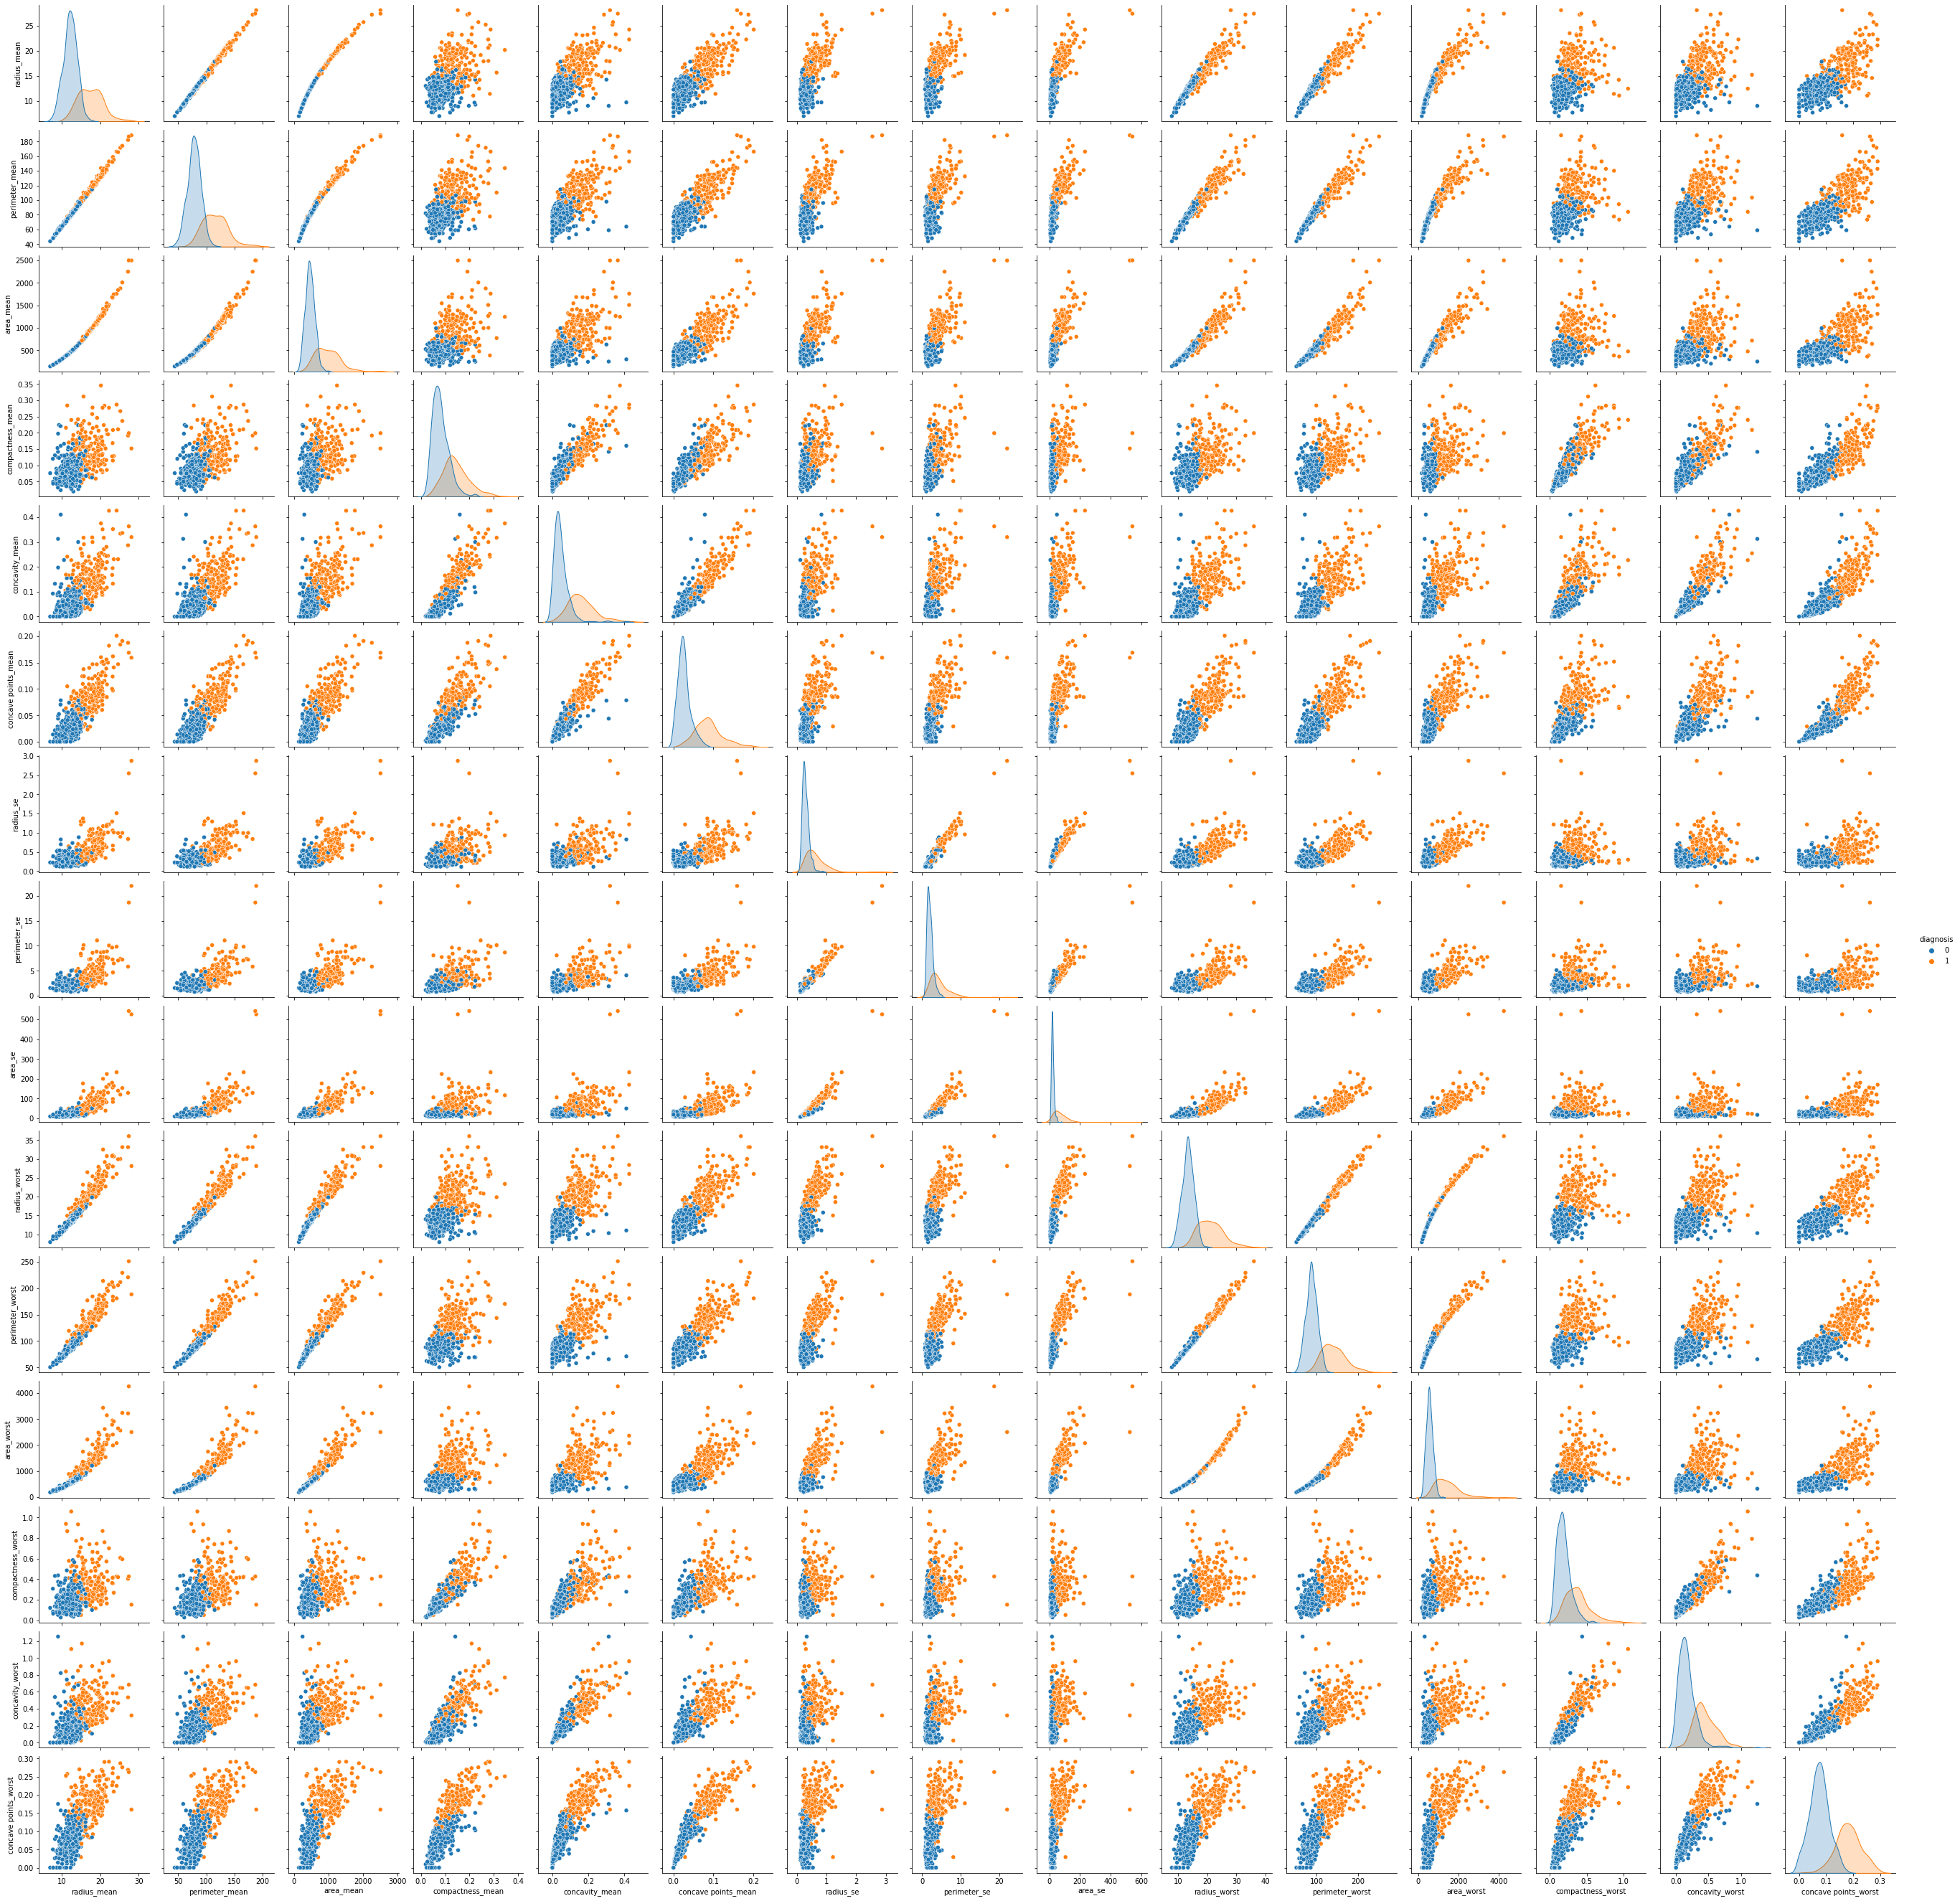

In [24]:
sns.pairplot(df[l1],hue='diagnosis')

**Model**

First we are going to train a model with all the features and based upon the correlation , another model will be created and compared with the first model.

In [72]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_pred = log_reg.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Trainig score:",accuracy_score(y_train, log_reg.predict(X_train)))
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print("Testing score:",log_reg_acc)

Trainig score: 0.989010989010989
Testing score: 0.9649122807017544


Based upon the correlation we are going to create another model

In [81]:
df1=df[l1]

In [82]:
df1.shape

(569, 16)

In [94]:
X1=df1.drop(['diagnosis'],axis=1)
y1=df1['diagnosis']

In [95]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 0)

In [96]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [97]:
log_reg = LogisticRegression()
log_reg.fit(X1_train, y1_train)

LogisticRegression()

In [98]:
y1_pred = log_reg.predict(X1_test)

In [99]:
print("Trainig score:",accuracy_score(y1_train, log_reg.predict(X1_train)))
log_reg_acc = accuracy_score(y1_test, log_reg.predict(X1_test))
print("Testing score:",log_reg_acc)

Trainig score: 0.9626373626373627
Testing score: 0.9210526315789473


The logistic model with all the features gives the better accuracy of 96%.

**SVM**

In [100]:
from sklearn.svm import SVC
svm_x_test=x_test
svm_x_train=x_train
svm_y_train=y_train
svm_y_test=y_test

svm_model = SVC()
svm_model.fit(svm_x_train,svm_y_train)

SVC()

In [101]:
svm_y_pred=svm_model.predict(svm_x_test)

In [110]:
svm=svm_model.score(svm_x_test,svm_y_test)
print("SVM SCORE:",svm)

SVM SCORE: 0.9385964912280702


SVM model gives the accuracy of 93% which is lower than the logistic model.

# Metrics

In [103]:
from sklearn.metrics import confusion_matrix,classification_report

In [104]:
print('Logistic regression')
print(classification_report(y_test,y_pred))

Logistic regression
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        73
           1       0.30      0.34      0.32        41

    accuracy                           0.47       114
   macro avg       0.45      0.44      0.44       114
weighted avg       0.49      0.47      0.48       114



In [105]:
print('Logistic regression')
confusion_matrix(model.predict(x_test),y_test)

Logistic regression


array([[72,  5],
       [ 1, 36]], dtype=int64)

<AxesSubplot:>

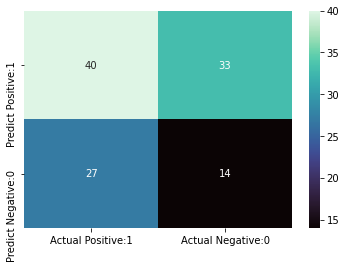

In [111]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [106]:
print('SVM')
print(classification_report(svm_y_test,svm_y_pred))

SVM
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        73
           1       0.97      0.85      0.91        41

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [112]:
print('SVM')
confusion_matrix(svm_model.predict(svm_x_test),y_test)

SVM


array([[72,  6],
       [ 1, 35]], dtype=int64)

<AxesSubplot:>

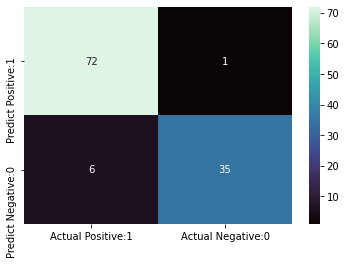

In [113]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(svm_y_test, svm_y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')